In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
df.shape

(200, 5)

The dataset has 200 rows and 5 columns.

The column Unnamed: 0 is not needed so removing from dataframe.

In [5]:
#Dropping the 1st column
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the column are of float data type.

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

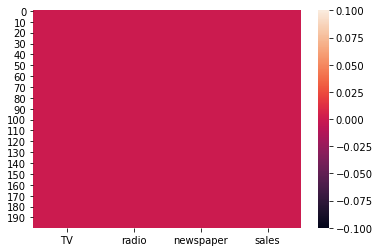

In [8]:
sns.heatmap(df.isnull())

There is no null value present in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The dataframe consist of 200 rows and 4 columns.

The columns TV,radio,newspaper and sales has 200 non-null values of float datatype.

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


All the columns in the dataframe has 200 columns.

The mean is greater than median in radio,newspaper and sales

The 75th percentile and Max has difference in TV,radio,newspaper and sales, So outliers are present.

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

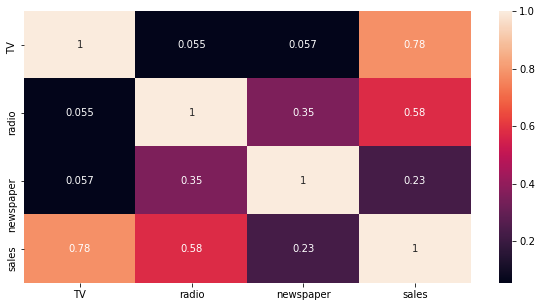

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

The output variable/label sales is positively correlated to TV,radio and newspaper.

Sales mostly correlated to TV and least correlated to newspaper.

In [13]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Small skewness is present in newspaper

Data Visualization

<AxesSubplot:xlabel='TV', ylabel='Density'>

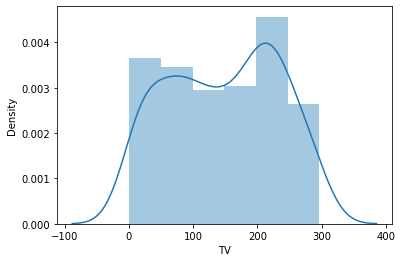

In [14]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

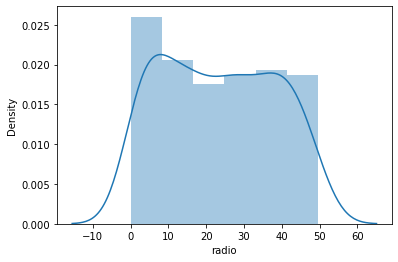

In [15]:
sns.distplot(df['radio'])

The data distribution in TV,radio are not normal distribution.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

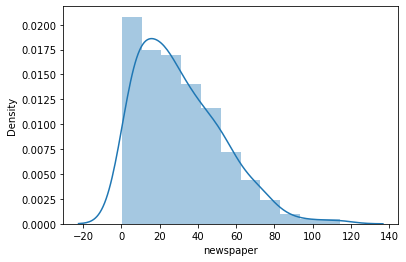

In [16]:
sns.distplot(df['newspaper'])

There is skewness is present in the newspaper column.

In [17]:
#removing skewness
df['newspaper']=np.sqrt(df['newspaper'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

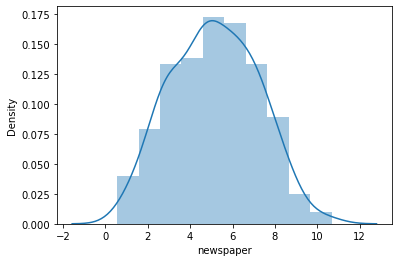

In [18]:
sns.distplot(df['newspaper'])

The distribution of data is good.

In [19]:
df['TV']=np.sqrt(df['TV'])
df['radio']=np.sqrt(df['radio'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

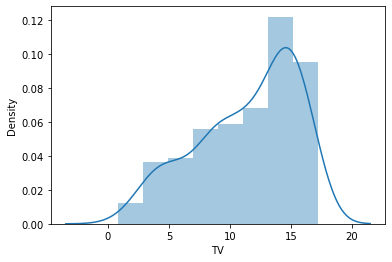

In [20]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

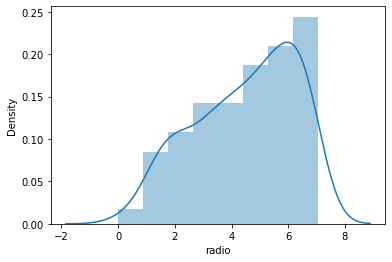

In [21]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

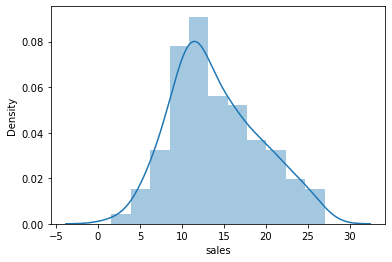

In [22]:
sns.distplot(df['sales'])

The data distribution in sales are normally distributed.

Checking outliers

<AxesSubplot:>

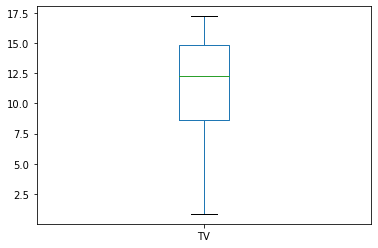

In [23]:
df['TV'].plot.box()

<AxesSubplot:>

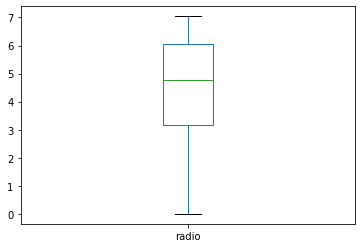

In [24]:
df['radio'].plot.box()

<AxesSubplot:>

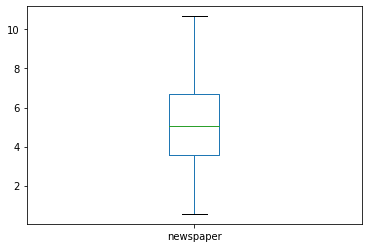

In [25]:
df['newspaper'].plot.box()

There is no outliers present in the features.

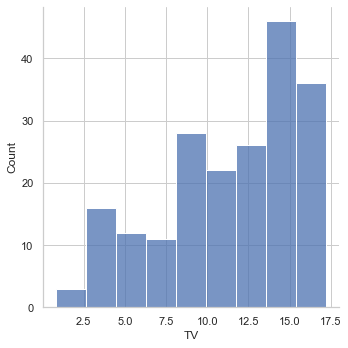

In [26]:
sns.set(style='whitegrid')
sns.displot(df['TV'])

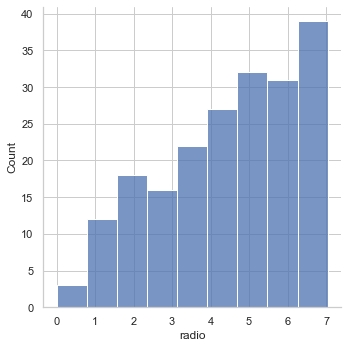

In [27]:
sns.set(style='whitegrid')
sns.displot(df['radio'])

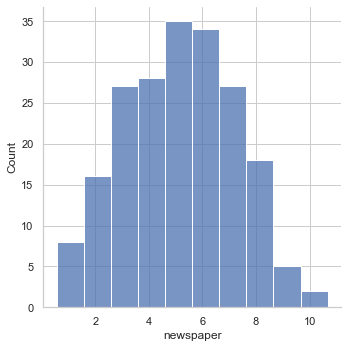

In [28]:
sns.set(style='whitegrid')
sns.displot(df['newspaper'])

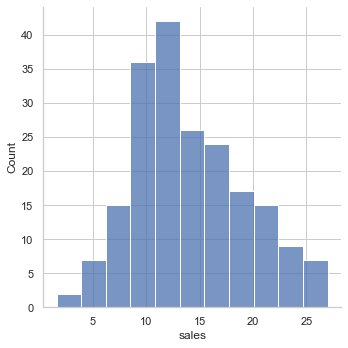

In [29]:
sns.set(style='whitegrid')
sns.displot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='sales'>

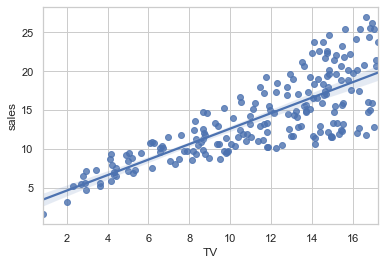

In [30]:
sns.regplot(x=df['TV'],y=df['sales'],data=df)

TV is positively correlated to sales, as the number of TV increases sale also increases.

<AxesSubplot:xlabel='radio', ylabel='sales'>

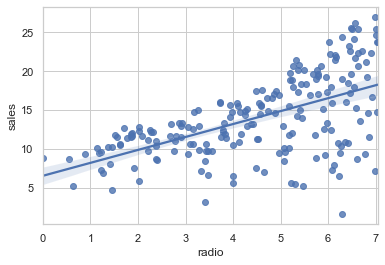

In [31]:
sns.regplot(x=df['radio'],y=df['sales'],data=df)

Radio is also positively correlated to sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

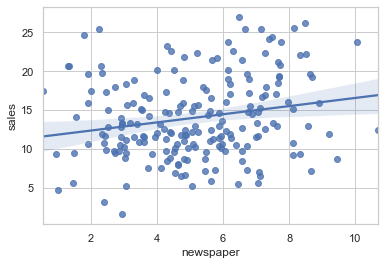

In [32]:
sns.regplot(x=df['newspaper'],y=df['sales'],data=df)

news paper is least correlated to sales.

In [33]:
#Seperating independent variables and dependent variable.

X=df.drop('sales',axis=1)
Y=df['sales']
X

,TV,radio,newspaper
0,15.169047,6.148170,8.318654
1,6.670832,6.268971,6.715653
2,4.147288,6.774954,8.324662
3,12.308534,6.426508,7.648529
4,13.446189,3.286335,7.641989
...,...,...,...
195,6.180615,1.923538,3.714835
196,9.705668,2.213594,2.846050
197,13.304135,3.049590,2.529822
198,16.840428,6.480741,8.136338


In [34]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [35]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,5.334219,TV
1,6.647235,radio
2,6.640685,newspaper


No multicollinearity present.

In [36]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[ 9.12803621e-01,  9.38682050e-01,  1.56309461e+00],
       [-1.14664513e+00,  1.00693575e+00,  7.74855194e-01],
       [-1.75819812e+00,  1.29282131e+00,  1.56604912e+00],
       [ 2.19589658e-01,  1.09594548e+00,  1.23357596e+00],
       [ 4.95287899e-01, -6.78285088e-01,  1.23036007e+00],
       [-2.04845041e+00,  1.41593691e+00,  1.73106889e+00],
       [-9.25621467e-01,  7.00788843e-01, -1.43678801e-01],
       [-1.06345970e-01, -3.36908504e-02, -8.52652825e-01],
       [-2.05257032e+00, -1.71632122e+00, -2.03568892e+00],
       [ 6.62228849e-01, -1.62404715e+00, -2.63332869e-01],
       [-7.92985665e-01, -1.17437367e+00, -1.08436840e-01],
       [ 7.87659143e-01,  2.32875924e-01, -1.54396138e+00],
       [-1.58099111e+00,  8.12320165e-01,  1.46436938e+00],
       [-3.70342100e-01, -9.77472654e-01, -1.20797302e+00],
       [ 6.98893364e-01,  7.05717845e-01,  8.07641928e-01],
       [ 6.24300915e-01,  1.36715681e+00,  1.04903522e+00],
       [-7.67810308e-01,  8.83097961e-01

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=52)
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9192983782714612

In [39]:
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))

0.8727984872780221


Lasso and Ridge Regression

In [40]:
from sklearn.linear_model import Ridge,Lasso
#Lasso
lso=Lasso()
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.8223443499625055

In [41]:
predlso=lso.predict(x_test)
print(r2_score(y_test,predlso))

0.8540670570945883


In [42]:
#Ridge

rdg=Ridge()
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.9192409135082248

In [43]:
predrdg=rdg.predict(x_test)
print(r2_score(y_test,predrdg))

0.8753013562218002


Support Vector Regression

In [44]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.9185280416935248

In [45]:
predsvr=svr.predict(x_test)
print(r2_score(y_test,predsvr))

0.8820981748668049


Cross validation

In [46]:
from sklearn.model_selection import cross_val_score
#linear
score=cross_val_score(lr,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.90729489 0.88806591 0.92230622 0.9140784  0.90341882 0.85141486
 0.87803742 0.94506039 0.85217529 0.90532712]
0.8967179323158347
0.028256443607716297


In [47]:
#lasso
score=cross_val_score(lso,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.90817263 0.86883425 0.87308425 0.92689769 0.88701259 0.88813797
 0.87505948 0.92138359 0.78717723 0.89096928]
0.8826728968916127
0.036990475828780435


In [48]:
#Ridge
score=cross_val_score(rdg,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.90735876 0.88796291 0.92198272 0.91432477 0.90349548 0.85191425
 0.8781958  0.94501343 0.85162556 0.90538794]
0.8967261623102237
0.028240942163811854


In [49]:
#SVR
score=cross_val_score(svr,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.94306727 0.92387964 0.92859027 0.97090979 0.94814247 0.94314746
 0.88071354 0.9463119  0.93065248 0.92617165]
0.9341586475836685
0.022188256988251845


Hyperparameter Tuning

In [50]:
#SVR
from sklearn.model_selection import GridSearchCV

grid_para={'kernel':('poly','rbf','linear','sigmoid'),'C':[1,10,100,1000],'gamma':['scale','auto']}
grid_search=GridSearchCV(estimator=svr,param_grid=grid_para,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ('poly', 'rbf', 'linear', 'sigmoid')})

In [51]:
best_para=grid_search.best_params_
print(best_para)

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [52]:
svr=SVR(C=100,gamma='auto',kernel='rbf')
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print(r2_score(y_test,predsvr))

0.9640831159043042


In [53]:
#Ridge

grid_para={'alpha':[1,10,100,1000],'solver':['svd','auto','sag','saga','lbfgs'],'max_iter':[1000,2000,3000,4000,5000]}
grid_search=GridSearchCV(estimator=rdg,param_grid=grid_para,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 100, 1000],
                         'max_iter': [1000, 2000, 3000, 4000, 5000],
                         'solver': ['svd', 'auto', 'sag', 'saga', 'lbfgs']})

In [54]:
best_para=grid_search.best_params_
print(best_para)

{'alpha': 10, 'max_iter': 5000, 'solver': 'saga'}


In [59]:
rdg=Ridge(alpha=10,max_iter=5000,solver='saga')
rdg.fit(x_train,y_train)
predrdg=rdg.predict(x_test)
print(r2_score(y_test,predrdg))

0.8903361456460298


The Ridge regression model r2 score and crossvalidation score is 89%.

This model gives better result.

In [56]:
import pickle
filename="Advertising.pkl"
pickle.dump(rdg,open(filename, 'wb'))

Conclusion

In [57]:
model=pickle.load(open("Advertising.pkl",'rb'))
result=model.score(x_test,y_test)
print(result)

0.890341056766932


In [58]:
Accuracy=pd.DataFrame([model.predict(x_test),predrdg],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Predicted,6.630786,16.813914,7.039362,15.266486,19.709004,16.750849,5.73809,19.517042,14.093314,7.159642,...,4.97105,15.691259,18.753286,16.857795,13.157397,21.807466,15.406129,10.442779,10.608126,6.130312
Original,6.630786,16.813914,7.039362,15.266486,19.709004,16.750849,5.73809,19.517042,14.093314,7.159642,...,4.97105,15.691259,18.753286,16.857795,13.157397,21.807466,15.406129,10.442779,10.608126,6.130312
